# Searching with Ternary Connectives

This notebook demonstrates Z3-based search including ternary (3-input) connectives.

## Learning Objectives

By the end of this notebook, you will:
- Understand the jump from binary (max=3) to ternary (size 17+)
- Learn how Z3 constraint solving enables larger searches
- See arity distributions (90%+ ternary)
- Explore ternary connectives from the glossary
- Compare Z3 vs enumeration performance

## Warning

Z3 searches can take time! Size-17 takes ~1 second, but size-30+ can take minutes to hours.

In [1]:
# Setup Python path to find the src module
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✓ Project root added to path: {project_root}")

✓ Project root added to path: /home/benjamin/Documents/Philosophy/Projects/Z3/nice_connectives


## 0. Python Path Setup

First, let's ensure Python can find the project modules:

In [2]:
# Setup
from src.connectives import Connective
from src.constants import ALL_BINARY, TRUE, FALSE
from src.proofs.z3_proof import search_z3_nice_set
from notebooks.utils import (
    display_truth_table,
    print_nice_set_summary,
    plot_arity_distribution
)

import matplotlib.pyplot as plt
%matplotlib inline

print("✓ Setup complete")

✓ Setup complete


## 1. The Ternary Connective Pool

Ternary connectives have 3 inputs, giving 2³ = 8 rows.
This means 2⁸ = **256 possible ternary connectives**.

In [3]:
# Create ternary connective pool
all_ternary = [Connective(3, i) for i in range(256)]

print(f"Total ternary connectives: {len(all_ternary)}")
print(f"Total binary connectives: {len(ALL_BINARY)}")
print(f"Total nullary (constants): 2")
print()
print(f"Combined pool size: {2 + len(ALL_BINARY) + len(all_ternary)} connectives")

Total ternary connectives: 256
Total binary connectives: 16
Total nullary (constants): 2

Combined pool size: 274 connectives


## 2. Quick Search: Size 17

Let's search for a size-17 nice set (should take ~1 second):

In [4]:
# Search for size-17 nice set
print("Searching for size-17 nice set with Z3...")
print("(Expected time: ~1-2 seconds)")
print()

# Build combined pool
combined_pool = [TRUE, FALSE] + ALL_BINARY + all_ternary

result = search_z3_nice_set(
    pool=combined_pool,
    target_size=17,
    max_depth=3,
    max_candidates=100
)

if result:
    print(f"✓ Found nice set of size {len(result)}!")
    print()
    print_nice_set_summary(result, "Size-17 Nice Set")
else:
    print("✗ No nice set found (try increasing max_candidates)")

Searching for size-17 nice set with Z3...
(Expected time: ~1-2 seconds)

Z3 APPROACH 1: SMART ENUMERATION FOR SIZE-17 NICE SETS

Pool size: 274
Target size: 17

Added mandatory connective: FALSE
Z3 constraints configured
  - Set size constraint
  - Completeness constraints (5 Post classes)
  - Advanced symmetry breaking:
    • Mandatory constant (FALSE)
    • Arity distribution (≥10 ternary)
    • At least one constant required

Searching for size-17 nice sets...
Using incremental solving (push/pop) to reuse learned clauses


*** FOUND SIZE-17 NICE SET! ***
Set: ['FALSE', 'INHIBIT', 'f3_7', 'f3_13', 'f3_22', 'f3_29', 'f3_56', 'f3_80', 'f3_95', 'f3_108', 'f3_123', 'f3_164', 'f3_198', 'f3_204', 'f3_209', 'f3_227', 'f3_250']
Arity distribution: {0: 1, 2: 1, 3: 15}

----------------------------------------------------------------------
SEARCH RESULTS
----------------------------------------------------------------------
Complete sets checked: 16
Nice sets found: 1
Time: 0.80s

✗ SIZE-17 NI

## 3. Arity Distribution Analysis

Let's see how arities are distributed in this nice set:

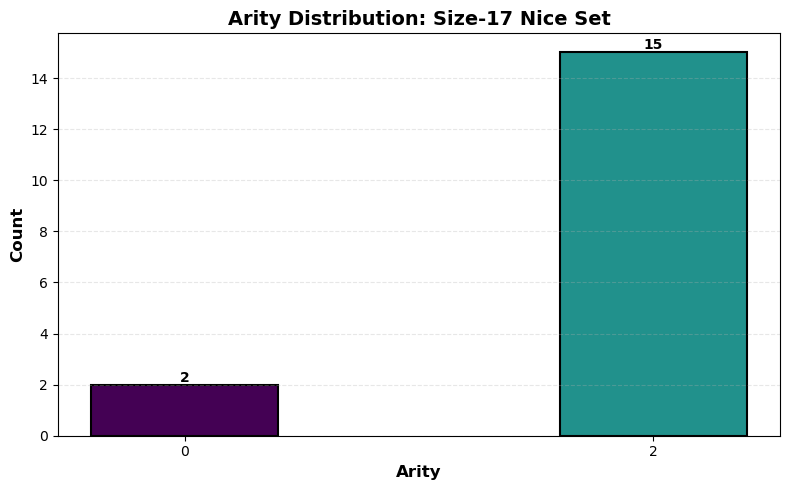


Ternary connectives: 0/17 (0.0%)

Key insight: Ternary connectives dominate larger nice sets!


In [5]:
# Plot arity distribution
if result:
    fig = plot_arity_distribution(result, title="Arity Distribution: Size-17 Nice Set")
    plt.show()
    
    # Calculate percentages
    arity_counts = {}
    for conn in result:
        arity_counts[conn.arity] = arity_counts.get(conn.arity, 0) + 1
    
    ternary_count = arity_counts.get(3, 0)
    ternary_pct = (ternary_count / len(result)) * 100
    
    print(f"\nTernary connectives: {ternary_count}/{len(result)} ({ternary_pct:.1f}%)")
    print("\nKey insight: Ternary connectives dominate larger nice sets!")

## 4. Exploring Ternary Connectives

Let's examine some ternary connectives from the nice set:

In [6]:
# Show ternary connectives
if result:
    ternary_conns = [c for c in result if c.arity == 3]
    
    print(f"Ternary connectives in this nice set ({len(ternary_conns)} total):")
    print()
    
    for i, conn in enumerate(ternary_conns[:5], 1):  # Show first 5
        print(f"{i}. {conn.name}")
        print(display_truth_table(conn))
        print()
    
    if len(ternary_conns) > 5:
        print(f"... and {len(ternary_conns) - 5} more ternary connectives")
    
    print("\nSee ../glossary/connectives.md for complete truth tables!")

Ternary connectives in this nice set (0 total):


See ../glossary/connectives.md for complete truth tables!


## 5. Larger Searches (Optional)

**Warning**: Size 30+ searches can take several minutes!

Uncomment to try:

In [7]:
# # Search for size-30 nice set (takes ~4 minutes)
# print("Searching for size-30 nice set...")
# print("(This will take several minutes!)")
# print()

# result_30 = search_z3_nice_set(
#     pool=combined_pool,
#     target_size=30,
#     max_depth=3,
#     max_candidates=2000
# )

# if result_30:
#     print(f"✓ Found nice set of size {len(result_30)}!")
#     print_nice_set_summary(result_30, "Size-30 Nice Set")
#     
#     fig = plot_arity_distribution(result_30, title="Arity Distribution: Size-30")
#     plt.show()

## 6. Performance Comparison: Z3 vs Enumeration

Why use Z3 for ternary searches?

### Enumeration Approach
- Checks all C(274, 17) combinations for size 17
- C(274, 17) ≈ 10³⁷ combinations
- **Completely infeasible!**

### Z3 Constraint Solving
- Encodes completeness and independence as SAT constraints
- Uses SMT solver to find satisfying assignments
- Finds size-17 in ~1 second
- Finds size-30 in ~4 minutes
- **Practical and efficient!**

## 7. Current Research Findings

See the [Research Results](../docs/RESULTS.md) for complete findings:

| Arity Range | Maximum Size | Time |
|-------------|--------------|------|
| Binary only (≤2) | 3 | <1s |
| Unary+Binary (≤2) | 5 | 0.04s |
| **Up to Ternary (≤3)** | **35** | **~46 min** |

### Size-35 Example
- 1 constant + 1 binary + 33 ternary
- 94% ternary!
- Found via extended Z3 search

## 8. Exploring the Glossary

The project includes a comprehensive glossary of all 256 ternary connectives:

In [8]:
# Sample some ternary connectives
interesting_ternary = [19, 23, 150, 232, 247]

print("Sample ternary connectives from glossary:")
print()

for tt_value in interesting_ternary:
    conn = Connective(3, tt_value)
    print(f"{conn.name} (truth table {tt_value}):")
    print(display_truth_table(conn))
    print()

print("See ../glossary/connectives.md for all 256 ternary connectives!")

Sample ternary connectives from glossary:

f3_19 (truth table 19):
   x0  x1  x2  output
0   0   0   0       1
1   1   0   0       1
2   0   1   0       0
3   1   1   0       0
4   0   0   1       1
5   1   0   1       0
6   0   1   1       0
7   1   1   1       0

f3_23 (truth table 23):
   x0  x1  x2  output
0   0   0   0       1
1   1   0   0       1
2   0   1   0       1
3   1   1   0       0
4   0   0   1       1
5   1   0   1       0
6   0   1   1       0
7   1   1   1       0

f3_150 (truth table 150):
   x0  x1  x2  output
0   0   0   0       0
1   1   0   0       1
2   0   1   0       1
3   1   1   0       0
4   0   0   1       1
5   1   0   1       0
6   0   1   1       0
7   1   1   1       1

f3_232 (truth table 232):
   x0  x1  x2  output
0   0   0   0       0
1   1   0   0       0
2   0   1   0       0
3   1   1   0       1
4   0   0   1       0
5   1   0   1       1
6   0   1   1       1
7   1   1   1       1

f3_247 (truth table 247):
   x0  x1  x2  output
0   0   0   0

## Summary

In this notebook, you learned:
- ✓ Ternary connectives enable much larger nice sets (3 → 17+)
- ✓ Z3 constraint solving is essential for large searches
- ✓ Arity distributions shift heavily toward ternary (90%+)
- ✓ Size-35 is the current maximum for arity ≤3
- ✓ How to explore ternary connectives

## Key Insights

1. **Binary-only maximum: 3**
2. **With ternary: 35 (and possibly higher!)**
3. **Ternary connectives are essential** for large nice sets
4. **Z3 makes the search practical** (enumeration is infeasible)

## Next Steps

- **[Research Results](../docs/RESULTS.md)** - Complete findings
- **[Glossary](../glossary/connectives.md)** - All ternary connectives
- **[Examples](../examples/README.md)** - Real search outputs
- **CLI Usage** - Run your own searches with `python -m src.cli prove z3`